In this notebook we will evaluate performance of different models to classify the images of Kazakh language cyrillic alphabet



In [101]:
#load data and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf


#load images from directory and split them into train and test sets
train_dir = 'Cyrillic/'
IMG_SIZE = 278

#I want to make scv file with all the images and their labels
#so I will use ImageDataGenerator to load images and their labels
import csv
import os
import random
from shutil import copyfile
def create_csv_file():
    with open('images.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["filename", "label"])
        #make list of all the folders in the directory
        folders = os.listdir(train_dir)
        #write all the images and their labels to the csv file, where label is the name of the folder maximum 20 images per folder
        for folder in folders:
            images = os.listdir(train_dir + folder)
            random.shuffle(images)
            for image in images[:20]:
                writer.writerow([train_dir + folder + '/' + image, folder])
create_csv_file()
tf.config.run_functions_eagerly(True)

In [102]:
df = pd.read_csv('images.csv', encoding='windows-1251')
df.head()

,filename,label
0,Cyrillic/I/58c112a5ce550.png,I
1,Cyrillic/I/58befb0d1017a.png,I
2,Cyrillic/I/58bf01a4195b7.png,I
3,Cyrillic/I/58bf1b1bad929.png,I
4,Cyrillic/I/58c1d7e02ffc7.png,I


['I' 'K1' 'Y1' 'Y2' 'Ё' 'А' 'А1' 'Б' 'В' 'Г' 'Г1' 'Д' 'Е' 'Ж' 'З' 'И' 'Й'
 'К' 'Л' 'М' 'Н' 'н1' 'О' 'О1' 'П' 'Р' 'С' 'Т' 'У' 'Ф' 'Х' 'Ц' 'Ч' 'Ш' 'Щ'
 'Ъ' 'Ы' 'Ь' 'Э' 'Ю' 'Я']


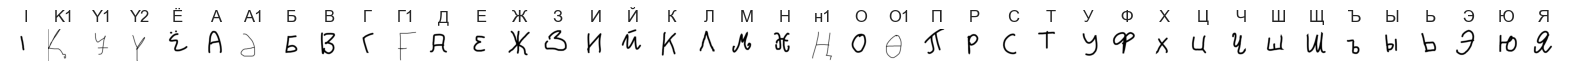

In [103]:
#show one image for every letter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
length = len(df['label'].unique())
#print all labels
print(df['label'].unique())
fig = plt.figure(figsize=(20, 20))
for i in range(length):
    img = mpimg.imread(df[df['label'] == df['label'].unique()[i]]['filename'].iloc[0])
    fig.add_subplot(1, length, i+1)
    plt.imshow(img)
    plt.title(df['label'].unique()[i])
    plt.axis('off')


In [106]:
#here we preprocess the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#we will use ImageDataGenerator to load images and their labels
#we will use rescale to normalize the images
#we will use validation_split to split the data into train and test sets

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filename",
    y_col="label",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode="categorical",
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filename",
    y_col="label",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode="categorical",
    subset='validation',
    shuffle=True
)


Found 656 validated image filenames belonging to 41 classes.
Found 164 validated image filenames belonging to 41 classes.


In [107]:
train_generator.class_indices

{'I': 0,
 'K1': 1,
 'Y1': 2,
 'Y2': 3,
 'Ё': 4,
 'А': 5,
 'А1': 6,
 'Б': 7,
 'В': 8,
 'Г': 9,
 'Г1': 10,
 'Д': 11,
 'Е': 12,
 'Ж': 13,
 'З': 14,
 'И': 15,
 'Й': 16,
 'К': 17,
 'Л': 18,
 'М': 19,
 'Н': 20,
 'О': 21,
 'О1': 22,
 'П': 23,
 'Р': 24,
 'С': 25,
 'Т': 26,
 'У': 27,
 'Ф': 28,
 'Х': 29,
 'Ц': 30,
 'Ч': 31,
 'Ш': 32,
 'Щ': 33,
 'Ъ': 34,
 'Ы': 35,
 'Ь': 36,
 'Э': 37,
 'Ю': 38,
 'Я': 39,
 'н1': 40}

In [111]:
#here we will create a linear model
linModel = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(41, activation='softmax')
])

linModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

linModel.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 231852)            0         
                                                                 
 dense_20 (Dense)            (None, 128)               29677184  
                                                                 
 dense_21 (Dense)            (None, 41)                5289      
                                                                 
Total params: 29,682,473
Trainable params: 29,682,473
Non-trainable params: 0
_________________________________________________________________


In [112]:
#here we will train the model and save everything to the LinMoDhistory
LinModHistory = linModel.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
21/21 [==============================] - 18s 840ms/step - loss: 25.6811 - accuracy: 0.0290 - val_loss: 297.6140 - val_accuracy: 0.0000e+00
Epoch 2/10
21/21 [==============================] - 11s 514ms/step - loss: 6.1667 - accuracy: 0.0488 - val_loss: 479.9029 - val_accuracy: 0.0000e+00
Epoch 3/10
21/21 [==============================] - 12s 558ms/step - loss: 9.2877 - accuracy: 0.0595 - val_loss: 578.8351 - val_accuracy: 0.0000e+00
Epoch 4/10
21/21 [==============================] - 10s 493ms/step - loss: 8.8683 - accuracy: 0.0655 - val_loss: 614.8513 - val_accuracy: 0.0000e+00
Epoch 5/10
21/21 [==============================] - 11s 499ms/step - loss: 9.0525 - accuracy: 0.0671 - val_loss: 528.8709 - val_accuracy: 0.0000e+00
Epoch 6/10
21/21 [==============================] - 13s 644ms/step - loss: 4.7850 - accuracy: 0.0823 - val_loss: 557.3412 - val_accuracy: 0.0000e+00
Epoch 7/10
21/21 [==============================] - 9s 441ms/step - loss: 5.8816 - accuracy: 0.0762 - val

In [123]:
#here we will create a Sequential model
SeqMod = tf.keras.models.Sequential()
SeqMod.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
SeqMod.add(tf.keras.layers.MaxPooling2D(2, 2))
SeqMod.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
SeqMod.add(tf.keras.layers.MaxPooling2D(2, 2))
SeqMod.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
SeqMod.add(tf.keras.layers.MaxPooling2D(2, 2))
SeqMod.add(tf.keras.layers.Flatten())
SeqMod.add(tf.keras.layers.Dropout(0.5))
SeqMod.add(tf.keras.layers.Dense(41, activation='softmax'))

SeqMod.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

SeqMod.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 276, 276, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 138, 138, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 136, 136, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 68, 68, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 66, 66, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 33, 33, 128)    

In [124]:
#here we will train the model and save everything to the SeqModHistory
SeqModHistory = SeqMod.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)


Epoch 1/10
21/21 [==============================] - 181s 8s/step - loss: 3.4267 - accuracy: 0.0473 - val_loss: 7.3359 - val_accuracy: 0.0000e+00
Epoch 2/10
21/21 [==============================] - 179s 8s/step - loss: 3.1932 - accuracy: 0.0976 - val_loss: 14.0701 - val_accuracy: 0.0000e+00
Epoch 3/10
21/21 [==============================] - 153s 7s/step - loss: 3.1366 - accuracy: 0.1067 - val_loss: 18.0838 - val_accuracy: 0.0000e+00
Epoch 4/10
21/21 [==============================] - 171s 8s/step - loss: 3.1200 - accuracy: 0.1113 - val_loss: 23.1211 - val_accuracy: 0.0000e+00
Epoch 5/10
21/21 [==============================] - 153s 7s/step - loss: 3.1112 - accuracy: 0.1220 - val_loss: 22.6159 - val_accuracy: 0.0000e+00
Epoch 6/10
21/21 [==============================] - 128s 6s/step - loss: 3.1137 - accuracy: 0.1021 - val_loss: 23.1690 - val_accuracy: 0.0000e+00
Epoch 7/10
21/21 [==============================] - 122s 6s/step - loss: 3.1092 - accuracy: 0.1174 - val_loss: 23.6593 - val_

In [130]:
#load all images from imagedatagenerator to x as np.array and all labels to y as np.array
x = np.array(train_generator[0][0])
y = np.array(train_generator[0][1])
for i in range(1, len(train_generator)):
    x = np.concatenate((x, np.array(train_generator[i][0])))
    y = np.concatenate((y, np.array(train_generator[i][1])))





In [136]:
#import naive bayes model
from sklearn.naive_bayes import GaussianNB

#reshape x to 2d array
x = x.reshape(x.shape[0], -1)
#reshape y to 1d array
y = y.argmax(axis=1)
#train the model
gnb = GaussianNB()
gnb.fit(x, y)

GaussianNB()

In [139]:
#show accuracy with x_val, y_val
x_val = np.array(validation_generator[0][0])
y_val = np.array(validation_generator[0][1])
for i in range(1, len(validation_generator)):
    x_val = np.concatenate((x_val, np.array(validation_generator[i][0])))
    y_val = np.concatenate((y_val, np.array(validation_generator[i][1])))

x_val = x_val.reshape(x_val.shape[0], -1)
y_val = y_val.argmax(axis=1)
print(gnb.score(x_val, y_val))


0.15154847


In [140]:
#here we will create a support vector machines model
from sklearn import svm
clf = svm.SVC()
clf.fit(x, y)

SVC()

In [142]:
#output accuracy with x_val, y_val
print(clf.score(x_val, y_val))

92.848474


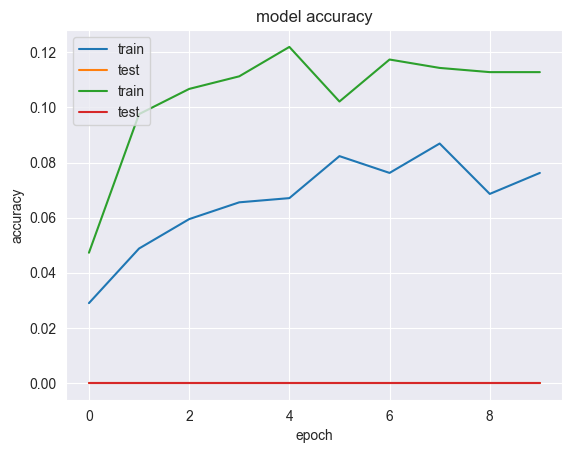

In [143]:
#plot the accuracy of the models over the epochs for the linear model and the sequential model
plt.plot(LinModHistory.history['accuracy'])
plt.plot(LinModHistory.history['val_accuracy'])
plt.plot(SeqModHistory.history['accuracy'])
plt.plot(SeqModHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'train', 'test'], loc='upper left')
plt.show()

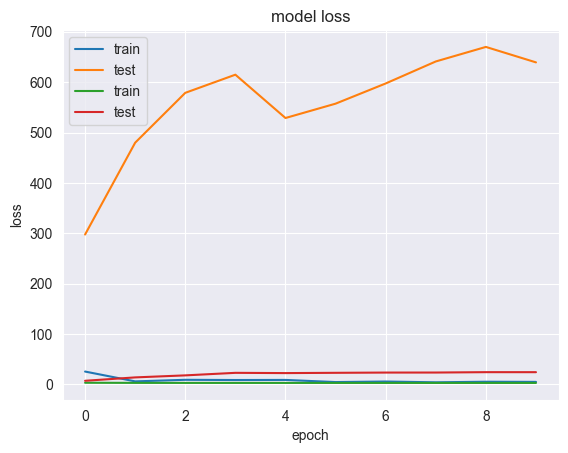

In [144]:
#plot the loss of the models over the epochs for the linear model and the sequential model
plt.plot(LinModHistory.history['loss'])
plt.plot(LinModHistory.history['val_loss'])
plt.plot(SeqModHistory.history['loss'])
plt.plot(SeqModHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'train', 'test'], loc='upper left')
plt.show()

As we can see the simplest Linear model cannot even achieve 10% accuracy, while Sequential model is able to achive 12% accuracy. Naive Bayes and SVM models are able to achieve much higher results. This is not a good result, but it is better than random guessing. We can try to improve the accuracy by using more complex models, but it will take a lot of time and resources. We can also try to use transfer learning, but it will also take a lot of time and resources. So, we will use the Sequential model for the final model. We can understand, that complext methods even show effectiveness as this Kazakhs MNIST is, where not over 20 images of each class are available. So, we will use the Sequential model for the final model.
